# ライブラリのインポート

In [1]:
# # ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics

# データの読み込み

In [2]:
# # trainデータ
train = pd.read_csv('train.csv')
# # testデータ
test = pd.read_csv('test.csv')
# # サンプル提出ファイル
sample_file = pd.read_csv('gender_submission.csv')

# データの観察

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print('trainデータの大きさ' + str(train.shape))
print(train.isnull().sum())
print('\n')
print('testデータの大きさ' + str(test.shape))
print(test.isnull().sum())

trainデータの大きさ(891, 12)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


testデータの大きさ(418, 11)
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


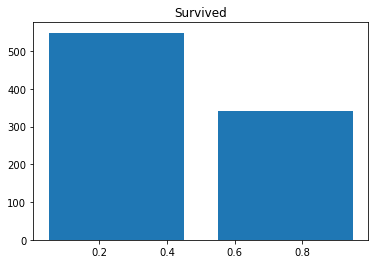

In [9]:
# # 目的変数'Survived'の分布
plt.title('Survived')
plt.hist(train['Survived'], bins = 2, rwidth = 0.8, align = 'mid');

# 前処理

In [7]:
# # 'Cabin'は欠損値が多いので、削除
train = train.drop('Cabin', axis = 1)
test = test.drop('Cabin', axis = 1)
# # 'Age'の欠損値を平均値補完
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())
# # 'Sex'をマッピング
sex_mapping = {'male':0, 'female':1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

# データの取り出し・標準化・分割

In [17]:
# X, yにデータを代入
X = train.loc[:, ['Sex', 'Age', 'SibSp', 'Parch', 'Pclass']].values
y = train.loc[:, ['Survived']].values.reshape(-1)

# データの標準化
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# ホールド・アウト法による分割
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)

# SVMで学習・精度算出

In [18]:
# カーネルSVMによる学習
# gamma: 決定曲線の複雑さ
# C: 誤分類への厳しさ
svm = SVC(kernel='rbf', gamma=0.1, C=10)
svm.fit(X_train, y_train)
print('trainデータ：' + str(metrics.accuracy_score(y_train, svm.predict(X_train))))
print('testデータ：' + str(metrics.accuracy_score(y_test, svm.predict(X_test))))

trainデータ：0.841091492777
testデータ：0.813432835821


# 配布されたテストデータで予測・提出

In [19]:
# testデータからデータの取り出し
test_data = test.loc[:, ['Sex', 'Age', 'SibSp', 'Parch', 'Pclass']].values
# 標準化
scaler = StandardScaler()
test_data_std = scaler.fit_transform(test_data)
# 提出データの予測
y_pred = svm.predict(test_data_std)

In [20]:
# 提出csvファイルの作成
submit_file = pd.DataFrame({'PassengerId' : test['PassengerId'], 'Survived' : y_pred})
submit_file.to_csv('submit.csv', index = False)